## Setup

Data manipulation libraries:

In [4]:
import numpy  as np
import pandas as pd

Visualization libraries:

In [5]:
import matplotlib.pyplot  as plt
import seaborn            as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

Pre-processing libraries:

In [6]:
from scipy import stats

Storage libraries:

In [7]:
from sqlalchemy import create_engine

## Data-set

Since the majority of election campaigns happen at the end of the year, 
the sample to be selected will be between September 2018 to December 2018.

In [8]:
def get_Data(num_weeks):
    url='http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    file_list=[]
    for week in num_weeks:
        file_url=url.format(week)
        file_list.append(pd.read_csv(file_url))
    return pd.concat(file_list)

num_weeks=[180908,180915,180922,180929,181006,181013,
           181020,181027,181103,181110,181117,181124,
           181201,181208,181215,181222,181229]
Sep_Dec_2018=get_Data(num_weeks)

## Data Overview

In [9]:
Sep_Dec_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3391706 entries, 0 to 201173
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [10]:
Sep_Dec_2018.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2018,00:00:00,REGULAR,6743736,2285840
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2018,04:00:00,REGULAR,6743756,2285844
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2018,08:00:00,REGULAR,6743769,2285873
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2018,12:00:00,REGULAR,6743855,2285946
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2018,16:00:00,REGULAR,6744069,2286006


In [11]:
Sep_Dec_2018.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
92311,N500,R020,00-03-00,47-50 STS ROCK,BDFM,IND,10/21/2018,04:00:00,REGULAR,10334596,8889170
24671,C028,R216,01-06-01,BAY RIDGE-95 ST,R,BMT,10/14/2018,08:00:00,REGULAR,153364370,45710
8589,A049,R088,02-03-01,CORTLANDT ST,RNW,BMT,09/30/2018,01:00:00,REGULAR,778234,195359
105067,N601,R319,00-03-00,LEXINGTON AV/63,F,IND,11/23/2018,15:00:00,REGULAR,809134,842559
20323,C008,R099,00-04-00,DEKALB AV,BDNQR,BMT,10/09/2018,00:00:00,REGULAR,7847,0


In [12]:
Sep_Dec_2018.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
201169,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/28/2018,11:12:57,REGULAR,5554,366
201170,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/28/2018,12:00:00,REGULAR,5554,366
201171,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/28/2018,12:19:32,REGULAR,5554,366
201172,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/28/2018,16:00:00,REGULAR,5554,366
201173,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/28/2018,20:00:00,REGULAR,5554,366


In [13]:
print('Data has {} rows and {} columns'.format(Sep_Dec_2018.shape[0], Sep_Dec_2018.shape[1]))

Data has 3391706 rows and 11 columns


In [14]:
print('Data columns: \n{}'.format(list(Sep_Dec_2018.columns)[:-1]))

Data columns: 
['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES']


## Feature Description

- C/A  = Control Area (A002)
- UNIT     = Remote Unit for a station (R051)
- SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)
- STATION  = Represents the station name the device is located at
- LINENAME = Represents all train lines that can be boarded at this station 
             Normally lines are represented by one character. 
- DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   
- DATE    = Represents the date (MM-DD-YY)
- TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
- DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
            1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
            2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered.
- ENTRIES  = The comulative entry register value for a device
- EXIST    = The cumulative exit register value for a device

## Checking for NaN

In [15]:
Sep_Dec_2018.isnull().values.any()

False

## Droping any duplicates

In [16]:
Sep_Dec_2018 = Sep_Dec_2018.drop_duplicates()

In [17]:
Sep_Dec_2018.shape

(3391706, 11)

## Striping 

Remove the strip from the columns values 

In [18]:
cols = Sep_Dec_2018.select_dtypes(['object']).columns
Sep_Dec_2018[cols] = Sep_Dec_2018[cols].apply(lambda x: x.str.strip())

Remove the strip from columns names

In [19]:
Sep_Dec_2018.columns = [column.strip() for column in Sep_Dec_2018.columns]

## Check for Outliers (Boxplot)

Over ENTRIES and EXITS columns

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


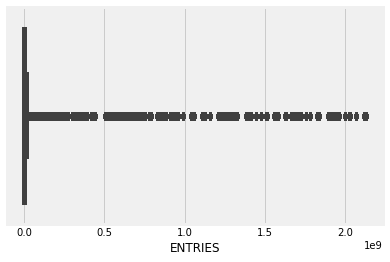

In [20]:
sns.boxplot(Sep_Dec_2018.ENTRIES);

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


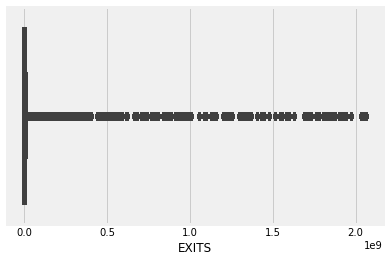

In [21]:
sns.boxplot(Sep_Dec_2018.EXITS);

## Calculate The Interquartile Range (Boxplot) 

In [22]:
Q3=Sep_Dec_2018['ENTRIES'].quantile(q=0.75)
Q1=Sep_Dec_2018['ENTRIES'].quantile(q=0.25)

IQR= Q3-Q1
Maximum_Num_Of_Entries= Q3+1.5*IQR  # The Maximum value will be used later to handle cumulative issue

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


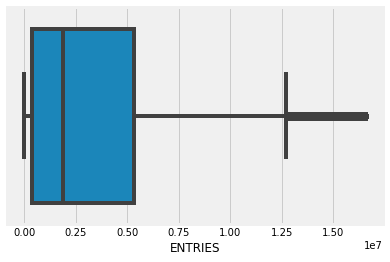

In [23]:
sns.boxplot(Sep_Dec_2018[Sep_Dec_2018['ENTRIES']<=Maximum_Num_Of_Entries].ENTRIES);

In [24]:
Q3=Sep_Dec_2018['EXITS'].quantile(q=0.75)
Q1=Sep_Dec_2018['EXITS'].quantile(q=0.25)

IQR= Q3-Q1
Maximum_Num_Of_EXITS= Q3+1.5*IQR  # The Maximum value will be used later to handle cumulative issue

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


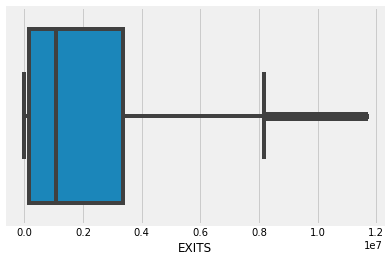

In [25]:
sns.boxplot(Sep_Dec_2018[Sep_Dec_2018['EXITS']<=Maximum_Num_Of_EXITS].EXITS);

## Apply Z-Score To Remove The Outliers

Calulate the z-score of each value in the column and take the absolute value of it.

In [26]:
numeric_cols = ['ENTRIES', 'EXITS']

In [27]:
Sep_Dec_2018 = Sep_Dec_2018[(np.abs(stats.zscore(Sep_Dec_2018[numeric_cols])) < 3).all(axis=1)]

##  Set all the values of STATION to be in Upper-case.

In [28]:
Sep_Dec_2018['STATION'] = Sep_Dec_2018['STATION'].str.upper()

##  Drop the “Recovery readings in the DESc column

In [29]:
Sep_Dec_2018.drop(Sep_Dec_2018.index[Sep_Dec_2018['DESC'] == 'RECOVR AUD'], inplace = True)

Since there is no need for the DESs column, we will drop it as well.

In [30]:
Sep_Dec_2018 = Sep_Dec_2018.drop(["DESC"], axis=1, errors="ignore")

## Create a sub DataFrame 
  For togethersignified a unique turnstile.

In [31]:
mta_daily = (Sep_Dec_2018.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE','EXITS'],as_index=False).ENTRIES.first())
mta_daily.sample(5)

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES
1282221,N505,R022,02-00-00,34 ST-HERALD SQ,10/12/2018,3642752,1317341
1358240,N531,R129,01-06-01,BERGEN ST,12/23/2018,2252083,620751
544580,K019,R413,00-03-00,KNICKERBOCKER,11/21/2018,1915178,4145553
1984401,R202,R042,00-00-02,BOWLING GREEN,11/11/2018,13961028,4042804
1596763,PTH13,R541,00-00-07,THIRTY ST,12/08/2018,12788,14775


## Feature Engineering 

Adding Date, Entries and Exits in the previous day. 

In [32]:
mta_daily[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (mta_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE","ENTRIES","EXITS"].apply(lambda grp: grp.shift(1)))


<ipython-input-32-3d40e579a44f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_daily[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (mta_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE","ENTRIES","EXITS"].apply(lambda grp: grp.shift(1)))


In [33]:
mta_daily.sample(5)

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1291551,N506,R022,00-03-00,34 ST-HERALD SQ,11/13/2018,4025410,871289,11/12/2018,871222.0,4025033.0
286977,C010,R231,00-00-02,UNION ST,12/26/2018,3378645,10983284,12/26/2018,10983274.0,3378601.0
1239654,N420B,R317,00-00-00,CLINTON-WASH AV,11/24/2018,1832988,875624,11/24/2018,875617.0,1832921.0
2076666,R236,R045,00-00-01,GRD CNTRL-42 ST,11/15/2018,1051659,504190,11/15/2018,503985.0,1050302.0
801089,N095A,R014,01-00-04,FULTON ST,12/12/2018,509030,1721187,12/12/2018,1720928.0,508931.0


#### when adding new feature, it may contains nulls value, so we should check. 

In [34]:
mta_daily.isnull().values.any()

True

In [35]:
mta_daily['PREV_DATE'].isnull().sum()

4742

In [36]:
mta_daily['PREV_ENTRIES'].isnull().sum()

4742

In [37]:
mta_daily['PREV_EXITS'].isnull().sum()

4742

#### Dropping the NaN's:

In [38]:
mta_daily.dropna(subset=['PREV_DATE','PREV_ENTRIES','PREV_EXITS'], axis=0, inplace=True)

In [39]:
mta_daily.isnull().values.any()

False

## Handling the Turnstile counter issue 

In [40]:
# Fixing counter For Entries
def get_daily_counts_for_entries(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Counter reversed?
        counter = -counter
    if counter > max_counter:
        # Counter reset to 0? 
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Still too big?
        return 0
    return counter


# Fixing counter For Exits
def get_daily_counts_for_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Counter reversed?
        counter = -counter
    if counter > max_counter:
        # Counter reset to 0? 
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Still too big?
        return 0
    return counter

Use the "Maximum_Num_Of_Entries" that was calculated from the previese IQR equation.

In [41]:
# Adding daily entries column.
mta_daily["DAILY_ENTRIES"] = mta_daily.apply(get_daily_counts_for_entries, axis=1, max_counter=Maximum_Num_Of_Entries)
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,09/02/2018,2286148,6744555,09/02/2018,6744471.0,2286100.0,84.0
2,A002,R051,02-00-00,59 ST,09/02/2018,2286202,6744719,09/02/2018,6744555.0,2286148.0,164.0
3,A002,R051,02-00-00,59 ST,09/02/2018,2286237,6744871,09/02/2018,6744719.0,2286202.0,152.0
4,A002,R051,02-00-00,59 ST,09/05/2018,2287150,6746909,09/02/2018,6744871.0,2286237.0,2038.0
5,A002,R051,02-00-00,59 ST,09/05/2018,2287385,6747060,09/05/2018,6746909.0,2287150.0,151.0


Use the "Maximum_Num_Of_EXITS" that was calculated from  the previese IQR equation.

In [42]:
# Adding daily exits column.
mta_daily["DAILY_EXITS"] = mta_daily.apply(get_daily_counts_for_exits, axis=1, max_counter=Maximum_Num_Of_EXITS)
mta_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
2704294,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/24/2018,366,5554,12/23/2018,5554.0,366.0,0.0,0.0
2704295,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2018,366,5554,12/24/2018,5554.0,366.0,0.0,0.0
2704296,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/26/2018,366,5554,12/25/2018,5554.0,366.0,0.0,0.0
2704297,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2018,366,5554,12/26/2018,5554.0,366.0,0.0,0.0
2704298,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/28/2018,366,5554,12/27/2018,5554.0,366.0,0.0,0.0


## Store the DataFrames 

#### As Database files: 

Main DF : Sep_Dec_2018 

In [44]:
engine = create_engine('sqlite:///Sep_Dec_2018.db', echo=True)
sqlite_connection = engine.connect()

Sub DF : mta_daily 

In [49]:
engine = create_engine('sqlite:///mta_daily.db', echo=True)
sqlite_connection = engine.connect()

#### As CSV files:

Main DF : Sep_Dec_2018 

In [48]:
Sep_Dec_2018.to_csv('Sep_Dec_2018.csv', index=False)

Sub DF : mta_daily 

In [50]:
mta_daily.to_csv('mta_daily.csv', index=False)